# ROC Curve - Multiclass
Vinicius Trevisan - 2022

## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

## Functions
Slightly modified from the binary classifier case

In [6]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [7]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]  # why shift the boundary in this way? I thought we had to increase the threshold incrementally
        y_pred = y_proba >= threshold 
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [8]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

## Multiclass classification evaluation with KS test

### Creating a synthetic dataset

In [9]:
scale = 3.5
size = 500

In [10]:
class1_x = np.random.normal(loc = 10, scale = scale, size = size)
class1_y = np.random.normal(loc = 1, scale = scale, size = size)

In [11]:
class2_x = np.random.normal(loc = 1, scale = scale, size = size)
class2_y = np.random.normal(loc = 5, scale = scale, size = size)

In [12]:
class3_x = np.random.normal(loc = 10, scale = scale, size = size)
class3_y = np.random.normal(loc = 10, scale = scale, size = size)

In [13]:
df_class1 = pd.DataFrame({'x' : class1_x, 'y' : class1_y, 'class': 'apple'})
df_class2 = pd.DataFrame({'x' : class2_x, 'y' : class2_y, 'class': 'banana'})
df_class3 = pd.DataFrame({'x' : class3_x, 'y' : class3_y, 'class': 'orange'})
df = df_class1.append(df_class2, ignore_index = True)
df = df.append(df_class3, ignore_index = True)

/var/folders/27/l6v26dbx0093xg448fxvxmpc0000gn/T/ipykernel_6148/194776675.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_class1.append(df_class2, ignore_index = True)
/var/folders/27/l6v26dbx0093xg448fxvxmpc0000gn/T/ipykernel_6148/194776675.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_class3, ignore_index = True)


<AxesSubplot:xlabel='x', ylabel='y'>

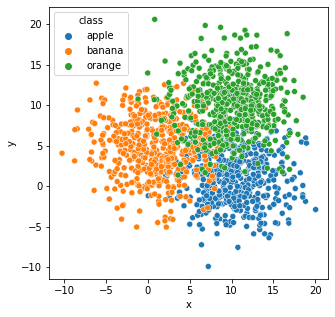

In [14]:
# Plot them to show how much they intersect
plt.figure(figsize=(5, 5))
sns.scatterplot(x = 'x', y = 'y', hue = 'class', data = df)

In [15]:
X = df[['x', 'y']]
y = df['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Fits the model and make the predictions

In [17]:
model_multiclass = RandomForestClassifier(n_estimators = 50, criterion = 'gini')

In [18]:
model_multiclass.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [19]:
y_pred = model_multiclass.predict(X_test)

In [20]:
y_proba = model_multiclass.predict_proba(X_test)

In [39]:
y_proba

array([[0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.58, 0.  , 0.42],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.06, 0.  , 0.94],
       [0.24, 0.  , 0.76],
       [0.22, 0.78, 0.  ],
       [0.08, 0.36, 0.56],
       [0.  , 0.9 , 0.1 ],
       [0.26, 0.68, 0.06],
       [0.24, 0.54, 0.22],
       [0.02, 0.  , 0.98],
       [0.54, 0.02, 0.44],
       [0.  , 0.  , 1.  ],
       [0.66, 0.12, 0.22],
       [0.  , 0.04, 0.96],
       [0.98, 0.  , 0.02],
       [0.1 , 0.9 , 0.  ],
       [0.  , 0.88, 0.12],
       [0.76, 0.02, 0.22],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.98, 0.02],
       [1.  , 0.  , 0.  ],
       [0.  , 0.12, 0.88],
       [0.64, 0.36, 0.  ],
       [0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.02, 0.  , 0.98],
       [1.  , 0.  , 0.  ],
       [0.96, 0.02, 0.02],
       [0.  , 0.54, 0.46],
       [0.86, 0.12, 0.02],
       [0.  , 0.  , 1.  ],
       [0.02, 0.98, 0.  ],
 

In [27]:
y_proba.shape

(300, 3)

In [41]:
(y_proba >= y_proba[0]) == (y_proba >= y_proba[3])

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

In [46]:
y_proba[:, 2]

array([1.  , 0.  , 0.42, 1.  , 0.  , 0.94, 0.76, 0.  , 0.56, 0.1 , 0.06,
       0.22, 0.98, 0.44, 1.  , 0.22, 0.96, 0.02, 0.  , 0.12, 0.22, 1.  ,
       0.  , 0.02, 0.  , 0.88, 0.  , 0.96, 1.  , 1.  , 0.98, 0.  , 0.02,
       0.46, 0.02, 1.  , 0.  , 0.  , 0.02, 0.14, 0.92, 0.02, 0.  , 1.  ,
       1.  , 0.64, 0.  , 1.  , 0.26, 0.  , 0.  , 0.08, 0.98, 1.  , 0.  ,
       0.96, 0.4 , 0.  , 0.  , 0.  , 1.  , 0.  , 0.4 , 0.  , 0.1 , 0.42,
       0.  , 0.84, 0.02, 0.  , 0.  , 0.48, 0.  , 0.98, 0.2 , 0.36, 0.22,
       0.98, 0.12, 0.  , 0.16, 0.  , 0.36, 0.92, 0.7 , 1.  , 0.  , 0.  ,
       0.02, 0.02, 0.02, 0.  , 0.06, 0.92, 0.12, 0.  , 0.  , 0.  , 0.14,
       0.  , 0.  , 0.  , 0.9 , 1.  , 0.  , 0.  , 0.32, 0.02, 1.  , 0.  ,
       1.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 1.  , 0.48, 1.  ,
       0.22, 0.08, 0.76, 0.  , 0.  , 0.04, 1.  , 0.  , 0.98, 0.08, 0.  ,
       0.  , 1.  , 0.02, 0.  , 0.08, 0.52, 0.38, 0.  , 0.86, 1.  , 0.46,
       0.22, 0.  , 0.16, 0.96, 0.28, 0.6 , 0.02, 0.

## ROC Curve - One vs Rest (OvR)
Compares each class with the rest of the classes

In [35]:
classes = model_multiclass.classes_
classes

array(['apple', 'banana', 'orange'], dtype=object)

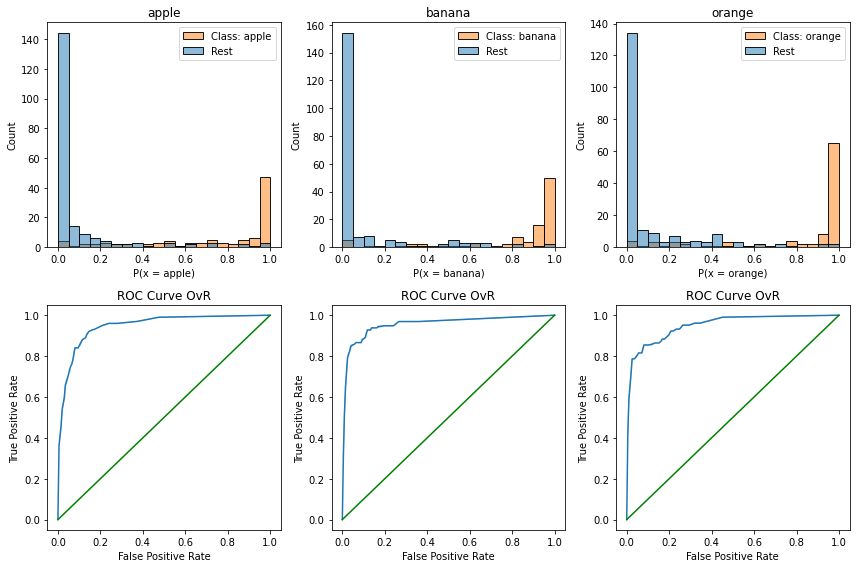

In [48]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):  #for each of the classes
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
#     print("class:", df_aux['class'])
#     print("prob:", df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [37]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

apple ROC AUC OvR: 0.9462
banana ROC AUC OvR: 0.9551
orange ROC AUC OvR: 0.9494
average ROC AUC OvR: 0.9502


In [38]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro')

0.9501974650583499

## ROC Curve - One vs One (OvO)
Compares each possible combination of the classes, two at a time

In [22]:
classes_combinations = []
class_list = list(classes)
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
classes_combinations

[['apple', 'banana'],
 ['banana', 'apple'],
 ['apple', 'orange'],
 ['orange', 'apple'],
 ['banana', 'orange'],
 ['orange', 'banana']]

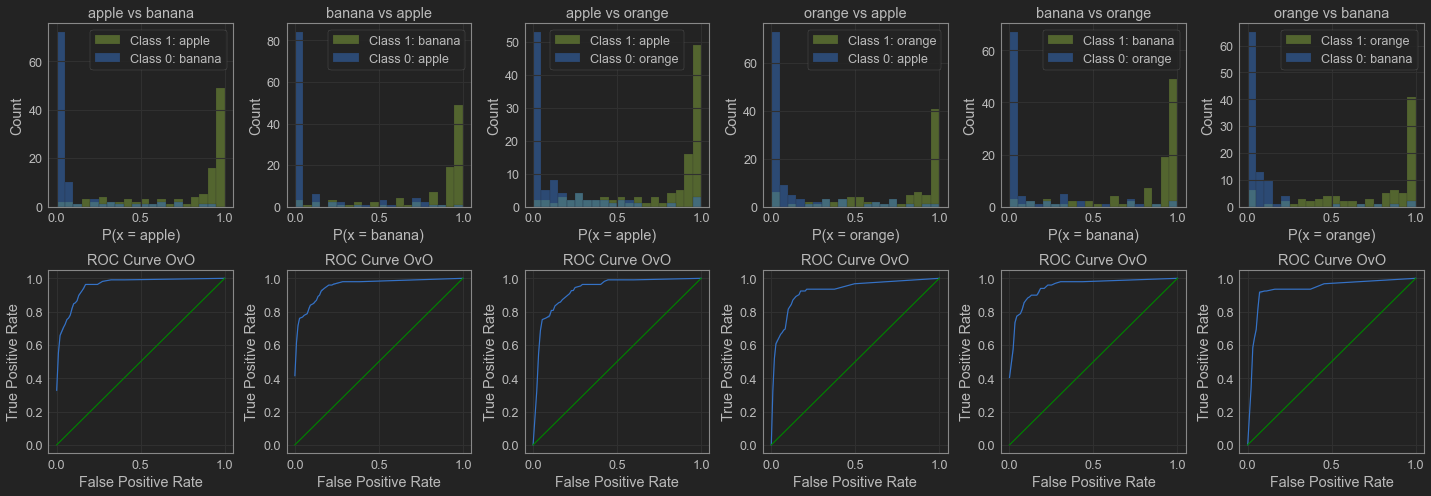

In [23]:
# Plots the Probability Distributions and the ROC Curves One vs ONe
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = c1 + " vs " +c2
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [24]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovo:
    avg_roc_auc += roc_auc_ovo[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.4f}")
print(f"average ROC AUC OvO: {avg_roc_auc/i:.4f}")

apple vs banana ROC AUC OvO: 0.9561
banana vs apple ROC AUC OvO: 0.9547
apple vs orange ROC AUC OvO: 0.9279
orange vs apple ROC AUC OvO: 0.9231
banana vs orange ROC AUC OvO: 0.9498
orange vs banana ROC AUC OvO: 0.9336
average ROC AUC OvO: 0.9409


In [25]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo', average = 'macro')

0.9408779995138192